## Declaring Libraries

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Load the data

In [2]:
data = pd.read_csv('survey-data.csv')

## Rename columns for easier access

In [3]:
column_mapping = {
    'Timestamp': 'timestamp',
    'Email Address': 'email',
    '1. What is your role?': 'role',
    '2. What is your educational level?': 'education_level',
    '3. What is your field of study/teaching?': 'field_of_study',
    '4. How would you rate your level of digital literacy?': 'digital_literacy',
    '5. How comfortable are you with using new technology and software?': 'comfort_with_technology',
    '6. Have you received any formal training on how to use AI tools for educational purposes?': 'received_training',
    '7. If yes, how helpful was the training you received on using AI tools?': 'training_helpfulness',
    '8. Please describe any additional training you wish you had received regarding AI tools.': 'additional_training_wish',
    '9. How familiar are you with traditional essays?': 'familiarity_traditional_essays',
    '10. How familiar are you with reflective reports?': 'familiarity_reflective_reports',
    '11. Which type of essay do you prefer to write with AI assistance?': 'preferred_essay_type',
    '12. Please explain why you prefer this type of essay with AI assistance.': 'preference_explanation',
    '13. On a scale of 1-5, how effective do you find AI tools in assisting with traditional essay writing?': 'effectiveness_traditional',
    '14. On a scale of 1-5, how effective do you find AI tools in assisting with reflective report writing?': 'effectiveness_reflective',
    '15. To what extent do AI tools enhance your learning experience for traditional essays?': 'enhancement_traditional',
    '16. To what extent do AI tools enhance your learning experience for reflective reports?': 'enhancement_reflective',
    '17. Describe a specific instance where AI tools significantly impacted your writing process.': 'impact_instance',
    '18. How often do you encounter issues such as bias or inaccuracies in automated essay grading for traditional essays?': 'issues_traditional',
    '19. How often do you encounter issues such as bias or inaccuracies in automated essay grading for reflective reports?': 'issues_reflective',
    '20. What usability issues have you encountered when using AI tools for traditional essays?': 'usability_issues_traditional',
    '21. What usability issues have you encountered when using AI tools for reflective reports?': 'usability_issues_reflective',
    '22. What improvements would you suggest for AI tools in educational settings?': 'suggested_improvements',
    '23. How satisfied are you with the user support provided for AI tools used for traditional essays?': 'satisfaction_support_traditional',
    '24. How satisfied are you with the user support provided for AI tools used for reflective reports?': 'satisfaction_support_reflective',
    '25. Do you think you would like to use AI tools frequently when writing traditional essays in the future?': 'future_use_traditional',
    '26. Do you think AI tools should be more integrated into classroom settings? Why or why not?': 'integration_opinion',
    '27. In your opinion, what is the most significant benefit of using AI tools for educational purposes?': 'significant_benefit'
}

data.rename(columns=column_mapping, inplace=True)

# print column names
print(data.columns)

Index(['timestamp', 'email', 'role', 'education_level', 'field_of_study',
       'digital_literacy', 'comfort_with_technology', 'received_training',
       'training_helpfulness', 'additional_training_wish',
       'familiarity_traditional_essays', 'familiarity_reflective_reports',
       'preferred_essay_type', 'preference_explanation',
       'effectiveness_traditional', 'effectiveness_reflective',
       'enhancement_traditional', 'enhancement_reflective', 'impact_instance',
       'issues_traditional', 'issues_reflective',
       'usability_issues_traditional', 'usability_issues_reflective',
       'suggested_improvements', 'satisfaction_support_traditional',
       'satisfaction_support_reflective', 'future_use_traditional',
       'integration_opinion', 'significant_benefit'],
      dtype='object')


## Check and handle missing values(fill with mean for numerical columns, mode for categorical)

In [4]:
print(data.isnull().sum())

data['effectiveness_traditional'].fillna(data['effectiveness_traditional'].mean(), inplace=True)
data['effectiveness_reflective'].fillna(data['effectiveness_reflective'].mean(), inplace=True)

/tmp/ipykernel_25/900877332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['effectiveness_traditional'].fillna(data['effectiveness_traditional'].mean(), inplace=True)
/tmp/ipykernel_25/900877332.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

timestamp                           0
email                               0
role                                0
education_level                     0
field_of_study                      0
digital_literacy                    0
comfort_with_technology             0
received_training                   0
training_helpfulness                0
additional_training_wish            3
familiarity_traditional_essays      0
familiarity_reflective_reports      0
preferred_essay_type                0
preference_explanation              2
effectiveness_traditional           0
effectiveness_reflective            0
enhancement_traditional             0
enhancement_reflective              0
impact_instance                     1
issues_traditional                  0
issues_reflective                   0
usability_issues_traditional        3
usability_issues_reflective         4
suggested_improvements              3
satisfaction_support_traditional    0
satisfaction_support_reflective     0
future_use_t

## Compute descriptive statistics

In [5]:
descriptive_stats = data[['digital_literacy', 'comfort_with_technology', 'effectiveness_traditional', 'effectiveness_reflective', 'enhancement_traditional', 'enhancement_reflective']].describe()
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        digital_literacy  comfort_with_technology  effectiveness_traditional  \
count         43.000000                43.000000                  43.000000   
mean           4.023256                 4.534884                   3.674419   
std            0.830616                 0.701998                   0.944178   
min            1.000000                 3.000000                   1.000000   
25%            4.000000                 4.000000                   3.000000   
50%            4.000000                 5.000000                   4.000000   
75%            5.000000                 5.000000                   4.000000   
max            5.000000                 5.000000                   5.000000   

       effectiveness_reflective  enhancement_traditional  \
count                 43.000000                43.000000   
mean                   3.465116                 3.651163   
std                    0.826606                 0.896653   
min                    

## Compare effectiveness ratings by role

In [6]:
role_comparison = data.groupby('role')[['effectiveness_traditional', 'effectiveness_reflective']].mean()
print("\nEffectiveness Ratings by Role:\n", role_comparison)


Effectiveness Ratings by Role:
             effectiveness_traditional  effectiveness_reflective
role                                                           
Developer                        1.00                       2.0
Researcher                       4.00                       4.0
Student                          3.75                       3.5
Worker                           3.00                       3.0


## Analyze correlations between effectiveness ratings and other variables

In [7]:
correlation_matrix = data[['digital_literacy', 'comfort_with_technology', 'effectiveness_traditional', 
                           'effectiveness_reflective', 'enhancement_traditional', 'enhancement_reflective', 
                           'training_helpfulness', 'issues_traditional','issues_reflective', 
                           'satisfaction_support_traditional', 'satisfaction_support_reflective']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                                   digital_literacy  comfort_with_technology  \
digital_literacy                          1.000000                 0.345659   
comfort_with_technology                   0.345659                 1.000000   
effectiveness_traditional                 0.192042                 0.089387   
effectiveness_reflective                  0.122582                 0.176530   
enhancement_traditional                  -0.020817                 0.152184   
enhancement_reflective                    0.127608                 0.001049   
training_helpfulness                      0.083877                 0.215965   
issues_traditional                        0.256546                 0.317306   
issues_reflective                         0.237660                 0.101352   
satisfaction_support_traditional          0.049363                 0.001007   
satisfaction_support_reflective           0.258874                 0.192752   

                             

## T-test to compare effectiveness between traditional essays and reflective reports

In [8]:
t_stat, p_value = stats.ttest_ind(data['effectiveness_traditional'], data['effectiveness_reflective'])
print(f"\nT-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 1.0937104423226327, P-Value: 0.27720850270669506


## Histogram for effectiveness of traditional essays

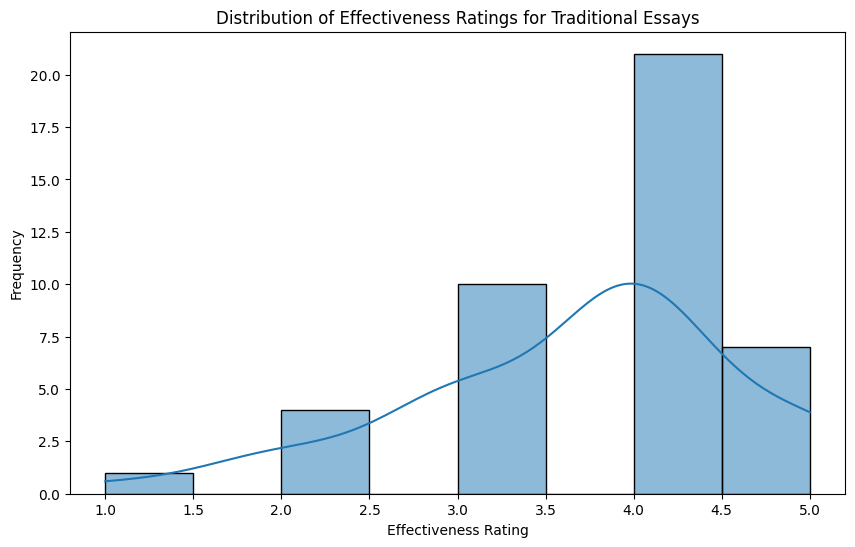

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['effectiveness_traditional'], kde=True)
plt.title('Distribution of Effectiveness Ratings for Traditional Essays')
plt.xlabel('Effectiveness Rating')
plt.ylabel('Frequency')
plt.show()

## Boxplot for effectiveness ratings

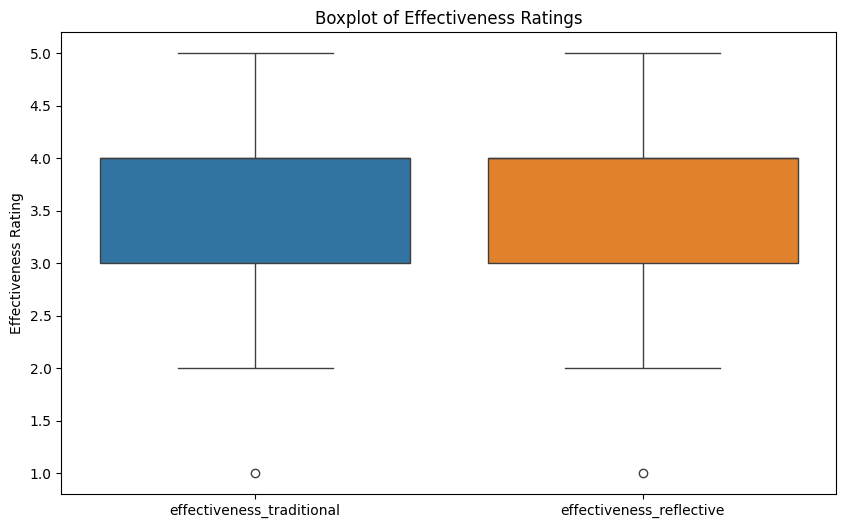

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['effectiveness_traditional', 'effectiveness_reflective']])
plt.title('Boxplot of Effectiveness Ratings')
plt.ylabel('Effectiveness Rating')
plt.show()

## Correlation heatmap

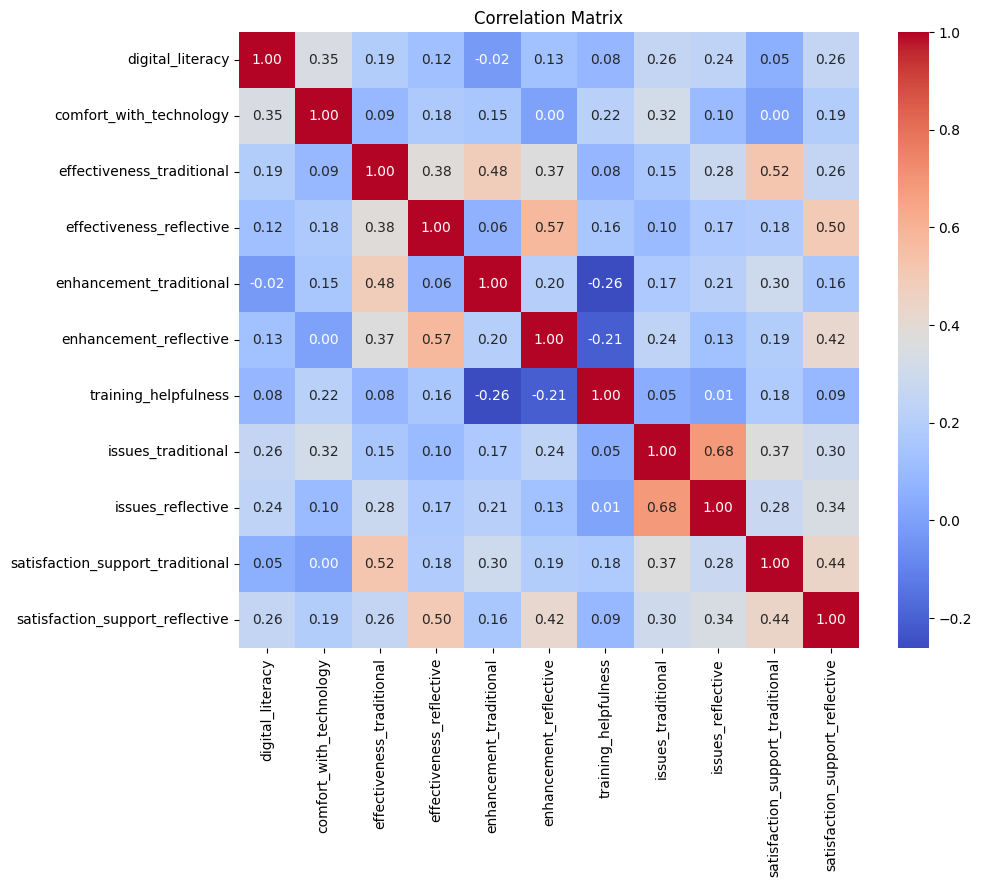

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Comparative Analysis by Educational Level

In [12]:
# Perform ANOVA test for effectiveness ratings across educational levels
anova_result = stats.f_oneway(
    data[data['education_level'] == 'Undergraduate']['effectiveness_traditional'].dropna(),
    data[data['education_level'] == 'Graduate']['effectiveness_traditional'].dropna(),
    data[data['education_level'] == 'Postgraduate']['effectiveness_traditional'].dropna()
)

print('ANOVA results for effectiveness_traditional:', anova_result)

ANOVA results for effectiveness_traditional: F_onewayResult(statistic=np.float64(3.612883435582822), pvalue=np.float64(0.036351254680264365))


## Post-hoc Test

In [13]:
# Prepare data for Tukey's HSD test
effectiveness_values = data[['education_level', 'effectiveness_traditional', 'effectiveness_reflective']].dropna()

# Perform Tukey's HSD test for traditional
tukey_result_traditional = pairwise_tukeyhsd(endog=effectiveness_values['effectiveness_traditional'],
                                 groups=effectiveness_values['education_level'],
                                 alpha=0.05)

print(tukey_result_traditional)

# Perform Tukey's HSD test for reflective
tukey_result_reflective = pairwise_tukeyhsd(endog=effectiveness_values['effectiveness_reflective'],
                                 groups=effectiveness_values['education_level'],
                                 alpha=0.05)

print(tukey_result_reflective)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1        group2    meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
    Graduate   High School   0.1304  0.999 -2.3329 2.5938  False
    Graduate  Postgraduate  -0.8696  0.067  -1.783 0.0439  False
    Graduate Undergraduate   0.0193 0.9999 -0.9288 0.9675  False
 High School  Postgraduate     -1.0 0.7149 -3.5292 1.5292  False
 High School Undergraduate  -0.1111 0.9994 -2.6531 2.4308  False
Postgraduate Undergraduate   0.8889 0.1547 -0.2191 1.9969  False
----------------------------------------------------------------
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1        group2    meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
    Graduate   High School   0.3478 0.9754 -1.8953  2.591  False
    Graduate  Postgraduate  -0.5522 0.2975 -1.3839 0.2796  False
    Graduate Undergraduat

## Effect Size Calculation

In [14]:
import numpy as np

def cohen_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    sd1, sd2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    pooled_sd = np.sqrt((sd1**2 + sd2**2) / 2)
    return (mean1 - mean2) / pooled_sd

# Sample data for calculations; replace with your actual data
group_pairs = [
    ('Graduate', 'High School'),
    ('Graduate', 'Postgraduate'),
    ('Graduate', 'Undergraduate'),
    ('High School', 'Postgraduate'),
    ('High School', 'Undergraduate'),
    ('Postgraduate', 'Undergraduate')
]

# Dictionary to store Cohen's d values
cohen_d_values = {}

for group1_name, group2_name in group_pairs:
    group1 = data[data['education_level'] == group1_name]['effectiveness_traditional'].dropna()
    group2 = data[data['education_level'] == group2_name]['effectiveness_traditional'].dropna()
    cohen_d_value = cohen_d(group1, group2)
    cohen_d_values[(group1_name, group2_name)] = cohen_d_value
    print(f"Cohen's d for {group1_name} vs {group2_name}: {cohen_d_value}")

# Interpret the effect sizes
for pair, d_value in cohen_d_values.items():
    print(f"{pair}: Cohen's d = {d_value}")
    if abs(d_value) < 0.2:
        print("Effect size: Small")
    elif abs(d_value) < 0.5:
        print("Effect size: Medium")
    else:
        print("Effect size: Large")


Cohen's d for Graduate vs High School: nan
Cohen's d for Graduate vs Postgraduate: 0.9229974861521764
Cohen's d for Graduate vs Undergraduate: -0.022128368701740626
Cohen's d for High School vs Postgraduate: nan
Cohen's d for High School vs Undergraduate: nan
Cohen's d for Postgraduate vs Undergraduate: -0.8951267821831349
('Graduate', 'High School'): Cohen's d = nan
Effect size: Large
('Graduate', 'Postgraduate'): Cohen's d = 0.9229974861521764
Effect size: Large
('Graduate', 'Undergraduate'): Cohen's d = -0.022128368701740626
Effect size: Small
('High School', 'Postgraduate'): Cohen's d = nan
Effect size: Large
('High School', 'Undergraduate'): Cohen's d = nan
Effect size: Large
('Postgraduate', 'Undergraduate'): Cohen's d = -0.8951267821831349
Effect size: Large


## Text preprocessing

In [15]:
# Define a function for text preprocessing
def preprocess_text(text):
    if not isinstance(text, str):  # Check if the input is not a string
        return ''  # Return an empty string or handle it appropriately
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to relevant columns
data['additional_training_wish_clean'] = data['additional_training_wish'].apply(preprocess_text) # question 8

# Question 12 - Familiarity and Preferences
data['preference_explanation_clean'] = data['preference_explanation'].apply(preprocess_text) # question 12

# Question 17 - Effectiveness and Impact of AI Tools
data['impact_instance_clean'] = data['impact_instance'].apply(preprocess_text) # question 17

# Questions 20, 21 and 22 - Challenges and Usability
data['usability_issues_traditional_clean'] = data['usability_issues_traditional'].apply(preprocess_text) # question 20
data['usability_issues_reflective_clean'] = data['usability_issues_reflective'].apply(preprocess_text) # question 21
data['suggested_improvements_clean'] = data['suggested_improvements'].apply(preprocess_text) # question 22

# Questions 26 and 27 - Overall Satisfaction and Future Use
data['integration_opinion_clean'] = data['integration_opinion'].apply(preprocess_text) # question 26
data['significant_benefit_clean'] = data['significant_benefit'].apply(preprocess_text) # question 27

## Word Frequency Analysis

In [16]:
def extract_keywords(texts, top_n=10):
    all_words = ' '.join(texts).split()
    freq_dist = Counter(all_words)
    return freq_dist.most_common(top_n)

# Display the top keywords for each question
print("Top keywords for additional training wish (Q8):", extract_keywords(data['additional_training_wish_clean']))

# Question 12 - Familiarity and Preferences
print("### Question 12 - Familiarity and Preferences ###")
print("Top keywords for preference explanation (Q12):", extract_keywords(data['preference_explanation_clean']))

# Question 17 - Effectiveness and Impact of AI Tools
print("### Question 17 - Effectiveness and Impact of AI Tools ###")
print("Top keywords for impact instance (Q17):", extract_keywords(data['impact_instance_clean']))

# Questions 20, 21 and 22 - Challenges and Usability
print("### Questions 20, 21 and 22 - Challenges and Usability ###")
print("Top keywords for traditional issues (Q20):", extract_keywords(data['usability_issues_traditional_clean']))
print("Top keywords for reflective issues (Q21):", extract_keywords(data['usability_issues_reflective_clean']))
print("Top keywords for suggested improvements (Q22):", extract_keywords(data['suggested_improvements_clean']))

# Questions 26 and 27 - Overall Satisfaction and Future Use
print("### Questions 26 and 27 - Overall Satisfaction and Future Use ###")
print("Top keywords for integration opinion (Q26):", extract_keywords(data['integration_opinion_clean']))
print("Top keywords for significant benefit (Q27):", extract_keywords(data['significant_benefit_clean']))

Top keywords for additional training wish (Q8): [('ai', 20), ('training', 13), ('data', 7), ('use', 4), ('applications', 4), ('prompt', 4), ('tools', 4), ('techniques', 4), ('enhance', 4), ('user', 4)]
### Question 12 - Familiarity and Preferences ###
Top keywords for preference explanation (Q12): [('ai', 15), ('essay', 13), ('traditional', 8), ('easy', 7), ('writing', 7), ('preference', 5), ('time', 4), ('help', 4), ('ideas', 4), ('topic', 3)]
### Question 17 - Effectiveness and Impact of AI Tools ###
Top keywords for impact instance (Q17): [('ai', 19), ('writing', 16), ('tools', 11), ('content', 8), ('helped', 8), ('report', 7), ('research', 7), ('significantly', 6), ('process', 6), ('topic', 5)]
### Questions 20, 21 and 22 - Challenges and Usability ###
Top keywords for traditional issues (Q20): [('ai', 16), ('tools', 9), ('leading', 6), ('irrelevant', 6), ('content', 6), ('issues', 5), ('suggestions', 5), ('sometimes', 5), ('usability', 4), ('nuanced', 4)]
Top keywords for reflecti

## Word Cloud Visualization

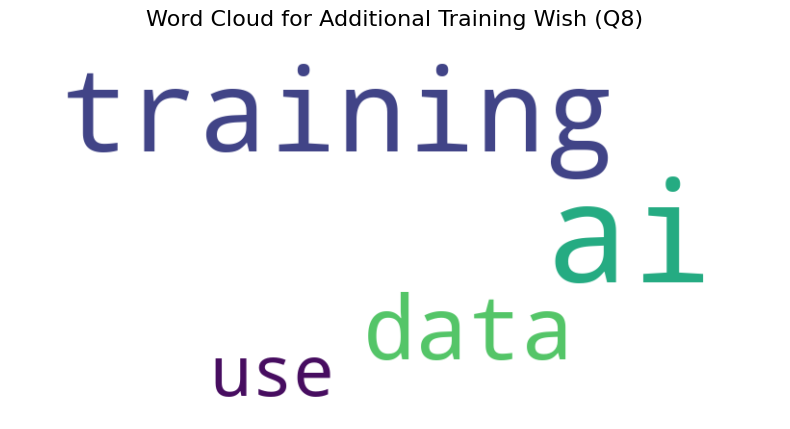

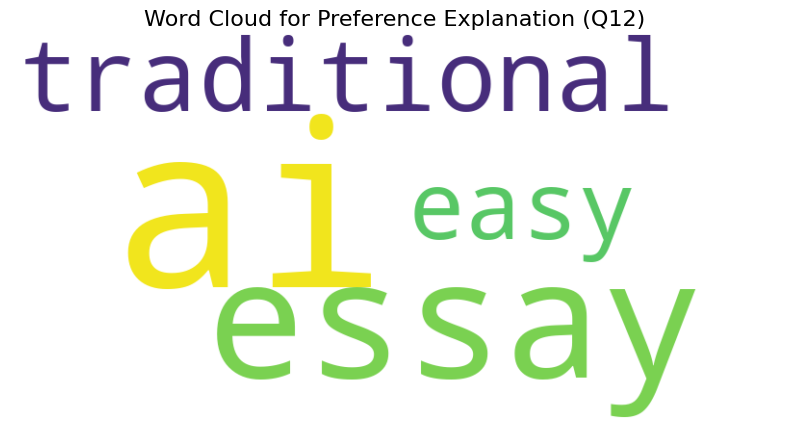

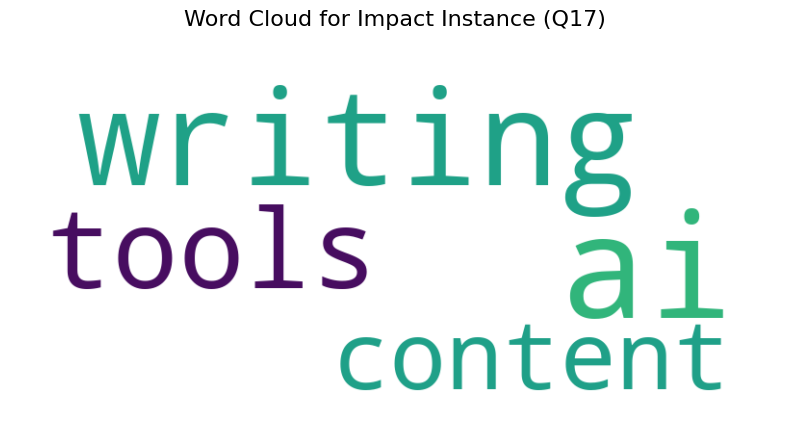

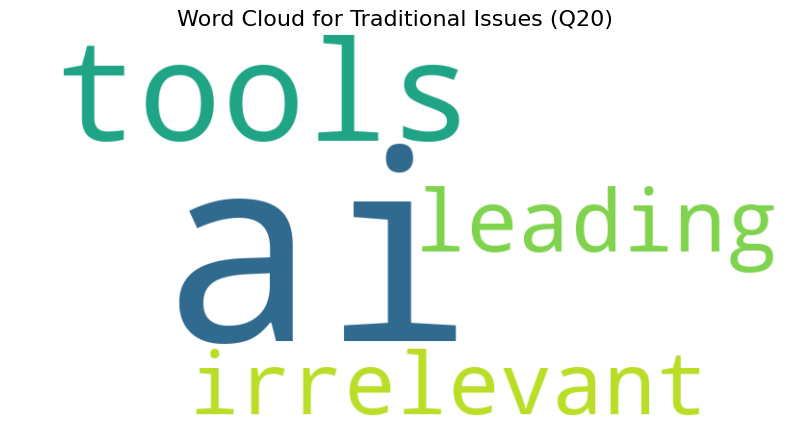

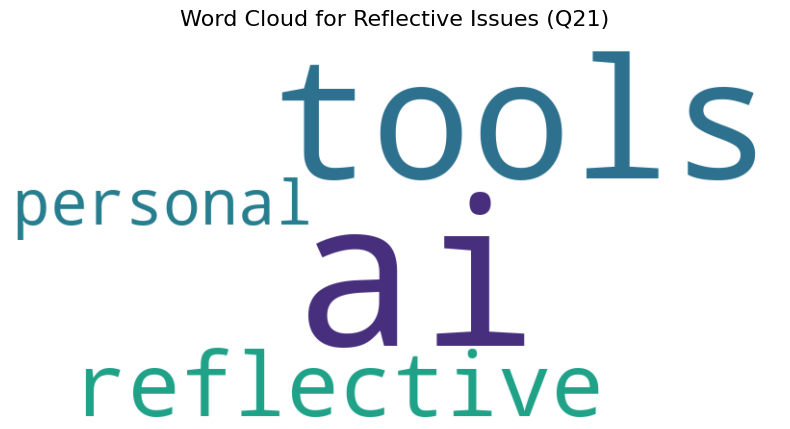

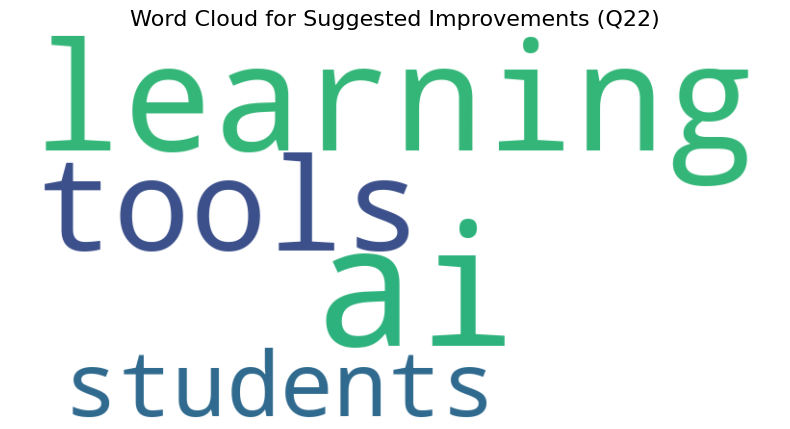

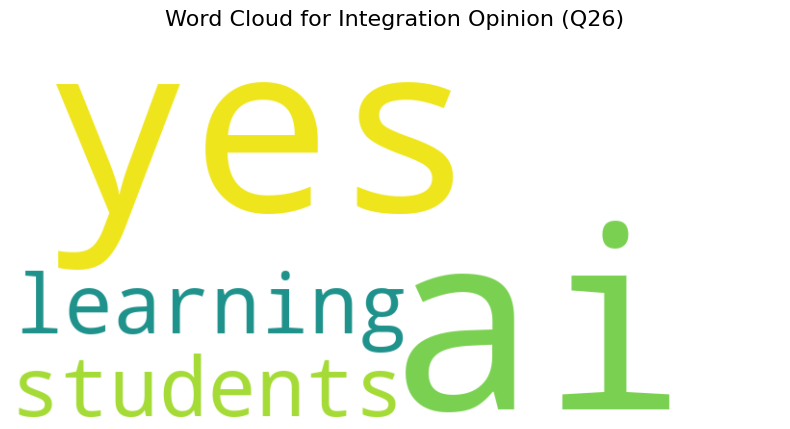

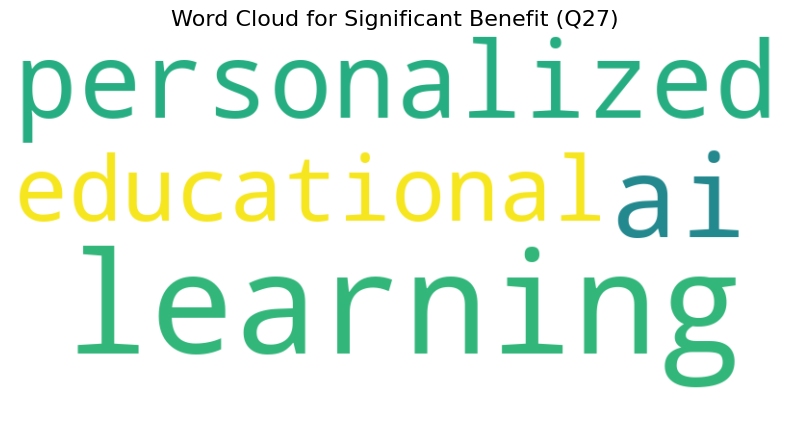

In [17]:
def generate_wordcloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds based on your frequency data
generate_wordcloud([('ai', 20), ('training', 13), ('data', 7), ('use', 4)], "Word Cloud for Additional Training Wish (Q8)")
generate_wordcloud([('ai', 15), ('essay', 13), ('traditional', 8), ('easy', 7)], "Word Cloud for Preference Explanation (Q12)")
generate_wordcloud([('ai', 19), ('writing', 16), ('tools', 11), ('content', 8)], "Word Cloud for Impact Instance (Q17)")
generate_wordcloud([('ai', 16), ('tools', 9), ('leading', 6), ('irrelevant', 6)], "Word Cloud for Traditional Issues (Q20)")
generate_wordcloud([('ai', 14), ('tools', 9), ('reflective', 8), ('personal', 7)], "Word Cloud for Reflective Issues (Q21)")
generate_wordcloud([('ai', 14), ('learning', 11), ('tools', 10), ('students', 8)], "Word Cloud for Suggested Improvements (Q22)")
generate_wordcloud([('ai', 23), ('yes', 21), ('learning', 14), ('students', 14)], "Word Cloud for Integration Opinion (Q26)")
generate_wordcloud([('learning', 18), ('ai', 11), ('personalized', 10), ('educational', 7)], "Word Cloud for Significant Benefit (Q27)")

## Bar Chart Visualization

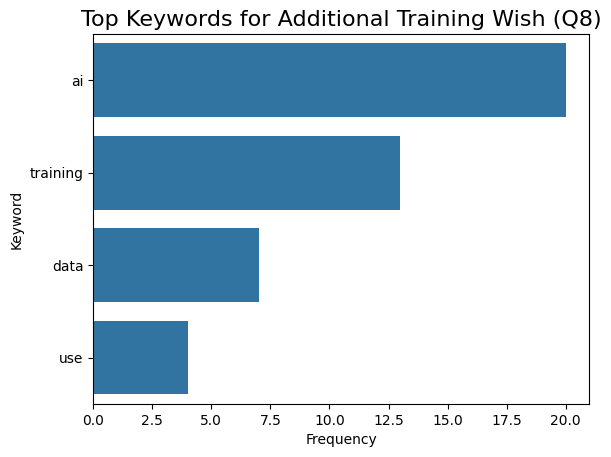

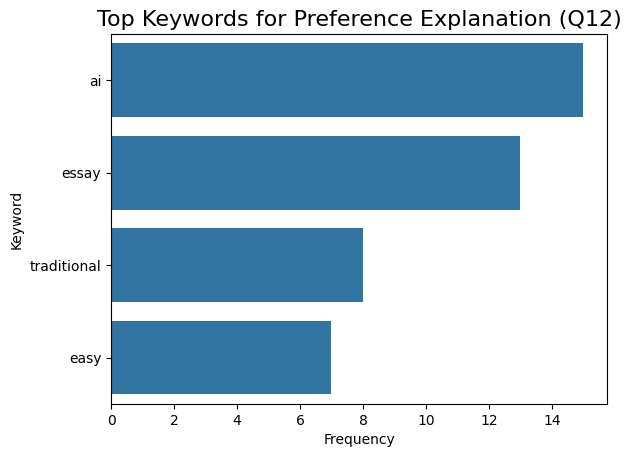

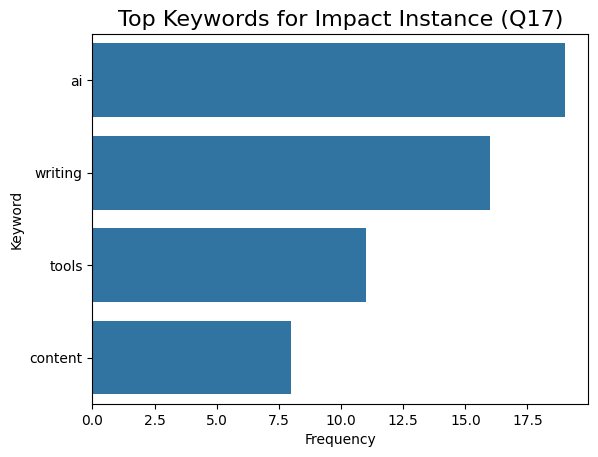

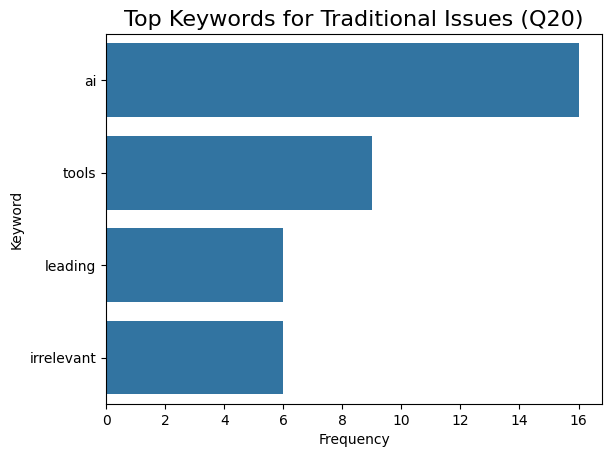

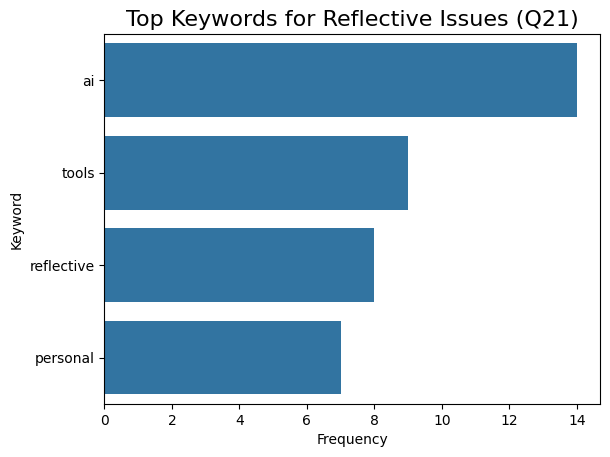

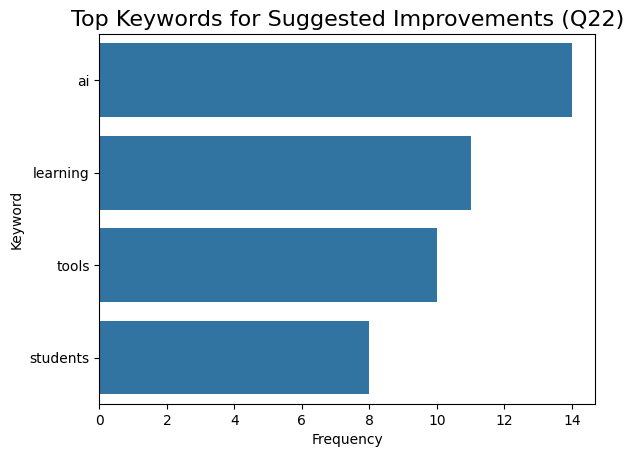

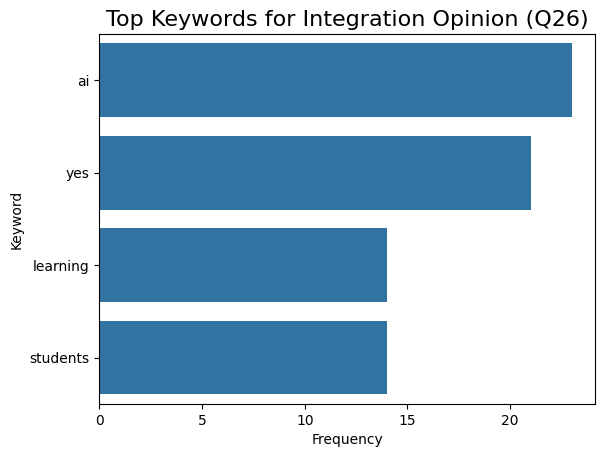

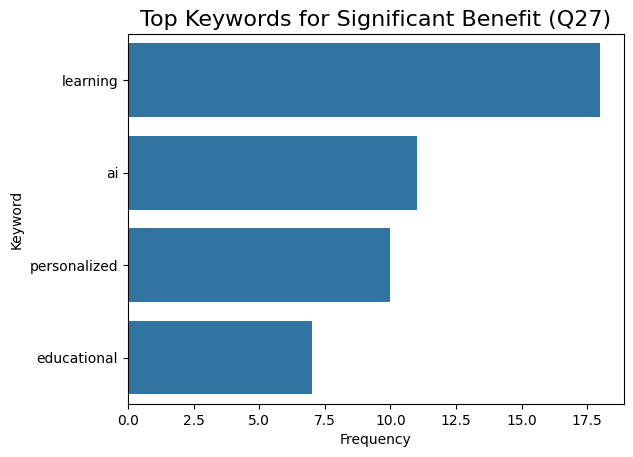

In [18]:
def plot_keyword_frequencies(keywords, title):
    df = pd.DataFrame(keywords, columns=['Keyword', 'Frequency'])
    sns.barplot(x='Frequency', y='Keyword', data=df)
    plt.title(title, fontsize=16)
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.show()

# Plotting keyword frequencies for each question
plot_keyword_frequencies([('ai', 20), ('training', 13), ('data', 7), ('use', 4)], "Top Keywords for Additional Training Wish (Q8)")
plot_keyword_frequencies([('ai', 15), ('essay', 13), ('traditional', 8), ('easy', 7)], "Top Keywords for Preference Explanation (Q12)")
plot_keyword_frequencies([('ai', 19), ('writing', 16), ('tools', 11), ('content', 8)], "Top Keywords for Impact Instance (Q17)")
plot_keyword_frequencies([('ai', 16), ('tools', 9), ('leading', 6), ('irrelevant', 6)], "Top Keywords for Traditional Issues (Q20)")
plot_keyword_frequencies([('ai', 14), ('tools', 9), ('reflective', 8), ('personal', 7)], "Top Keywords for Reflective Issues (Q21)")
plot_keyword_frequencies([('ai', 14), ('learning', 11), ('tools', 10), ('students', 8)], "Top Keywords for Suggested Improvements (Q22)")
plot_keyword_frequencies([('ai', 23), ('yes', 21), ('learning', 14), ('students', 14)], "Top Keywords for Integration Opinion (Q26)")
plot_keyword_frequencies([('learning', 18), ('ai', 11), ('personalized', 10), ('educational', 7)], "Top Keywords for Significant Benefit (Q27)")


## Exploring Variations Based on Educational Levels

In [19]:
# Separate the data based on education level
undergrad_data = data[data['education_level'] == 'Undergraduate']
grad_data = data[data['education_level'] == 'Graduate']
postgrad_data = data[data['education_level'] == 'Postgraduate']

# Apply word frequency analysis separately
undergrad_impact_instance = ' '.join(undergrad_data['impact_instance_clean'].dropna())
grad_impact_instance = ' '.join(grad_data['impact_instance_clean'].dropna())
postgrad_impact_instance = ' '.join(postgrad_data['impact_instance_clean'].dropna())

# Generate word clouds or frequency counts
undergrad_word_freq = Counter(undergrad_impact_instance.split())
grad_word_freq = Counter(grad_impact_instance.split())
postgrad_word_freq = Counter(postgrad_impact_instance.split())

# Print top keywords for comparison
print("Top keywords for undergraduates (impact instance):", undergrad_word_freq.most_common(10))
print("Top keywords for graduates (impact instance):", grad_word_freq.most_common(10))
print("Top keywords for postgraduates (impact instance):", postgrad_word_freq.most_common(10))

Top keywords for undergraduates (impact instance): [('writing', 4), ('content', 3), ('helps', 2), ('ai', 2), ('ielts', 2), ('yes', 1), ('improves', 1), ('capabilities', 1), ('basic', 1), ('mails', 1)]
Top keywords for graduates (impact instance): [('writing', 9), ('ai', 9), ('report', 6), ('tools', 6), ('process', 4), ('research', 4), ('structure', 3), ('vocabulary', 3), ('outline', 3), ('content', 3)]
Top keywords for postgraduates (impact instance): [('ai', 6), ('tools', 4), ('helped', 4), ('writing', 3), ('suggesting', 2), ('information', 2), ('topic', 2), ('like', 2), ('significantly', 2), ('check', 2)]


## Sentiment Analysis of Responses

In [20]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to key questions
data['sentiment_preference'] = data['preference_explanation_clean'].dropna().apply(get_sentiment)
data['sentiment_impact'] = data['impact_instance_clean'].dropna().apply(get_sentiment)
data['sentiment_traditional_issues'] = data['usability_issues_traditional_clean'].dropna().apply(get_sentiment)
data['sentiment_reflective_issues'] = data['usability_issues_reflective_clean'].dropna().apply(get_sentiment)

# Summary statistics
print("Average sentiment for preference explanation:", data['sentiment_preference'].mean())
print("Average sentiment for impact instance:", data['sentiment_impact'].mean())
print("Average sentiment for traditional issues:", data['sentiment_traditional_issues'].mean())
print("Average sentiment for reflective issues:", data['sentiment_reflective_issues'].mean())

Average sentiment for preference explanation: 0.14593484680693983
Average sentiment for impact instance: 0.10795234319943621
Average sentiment for traditional issues: -0.036272609819121455
Average sentiment for reflective issues: 0.05490863787375415


## Clustering Responses Based on Themes

In [21]:
# Vectorize the text data for clustering
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['impact_instance_clean'].dropna())

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the data
data['impact_cluster'] = clusters

# Analyze the clusters
print(data.groupby('impact_cluster')['impact_instance_clean'].apply(lambda x: ' '.join(x)).head())

impact_cluster
0    assigment project thesis recently vocabulary a...
1    content organization ai tools helped structuri...
2    help grammar structure citations decided use a...
Name: impact_instance_clean, dtype: object
